In [1]:
# YOU HAVE TO COPY-PASTE THE abstract_udmis.py file to the directory each time
import numpy as np
import matplotlib.pyplot as plt


from abstract_udmis import AbstractUDMIS

%matplotlib inline

In [2]:
class UDMIS(AbstractUDMIS):
    def __init__(self, u, graph):
        super().__init__()
        self.u, self.graph = u, graph
        self.num_vertices = len(self.graph)
        print(self.num_vertices)
        # initialize system at infinite temperature
        # i.e. vertices are completely random and uncorrelated
        self.occupations = np.random.rand(self.num_vertices) < 0.5
        self.edges = self.find_edges()
    
    def find_edges(self):
        #num_pairs = int(self.num_vertices*(self.num_vertices)*0.5)
        edges = np.zeros((self.num_vertices, self.num_vertices), dtype=bool)
        
        for i in range(self.num_vertices-1):
            x_i, y_i = graph[i] # these are the x, y coordinates of the i'th vertex in the graph
            for j in range(i+1, self.num_vertices):
                x_j, y_j = graph[j] # these are the x, y coordinates of the j'th vertex in the graph
                
                # calculate the distance between vertices
                dij = np.sqrt((x_i - x_j)**2. + (y_i - y_j)**2.)
                if dij <= 1.0:
                    edges[i,j] = True
                    edges[j,i] = True
                    
        return edges
        
    def energy(self):
        """Returns the energy of the current spin configuration"""
        # interaction term
        interaction_term = 0
        vertex_term = 0
        for i in range(self.num_vertices-1):
            for j in range(i+1, self.num_vertices):
                
                # check if there is an edge
                if self.edges[i,j]:
                    interaction_term += self.occupations[i]*self.occupations[j]
                
            vertex_term += self.occupations[i]
        
        # missed the last vertex
        vertex_term += self.occupations[self.num_vertices-1]
    
        return u*interaction_term - vertex_term

    def energy_diff(self, i):
        connections = np.where(self.edges[i,:])[0]
        num_adjacent_occupied = sum(self.occupations[connections])
        
        if self.occupations[i] == 1:
            # flipping an occupied vertex increases the vertex term, decreases the interaction term
            vertex_term_change = 1.
            interaction_term_change = -u*num_adjacent_occupied
        
        elif self.occupations[i] == 0:
            # flipping an unoccupied vertex decreases the vertex term, increases the interaction term
            vertex_term_change = -1.
            interaction_term_change = u*num_adjacent_occupied 

        return interaction_term_change + vertex_term_change
    
    def rand_vertex(self):
        """Selects a site in the graph at random"""
        return np.random.randint(self.num_vertices)

In [ ]:
u = 1.35
graph = [(1.19, 4.25), 
         (2.71, 3.48), 
         (1.19, 3.51), 
         (2.00, 3.38), 
         (1.12, 2.86), 
         (1.70, 2.42),
         (2.36, 2.54),  
         (1.52, 1.48),
         (2.15, 1.54), 
         (2.14, 1.87), 
         (1.72, 0.86),
         (2.29, 0.87)  
        ]

udmis = UDMIS(u, graph)

12


13
[1.19 2.71 1.19 2.   1.12 1.7  2.36 1.52 2.15 2.14 1.72 2.29 2.59]
[ 4.25  3.48  3.51  3.38  2.86  2.42  2.54  1.48  1.54  1.87  0.86  0.87
 10.89]


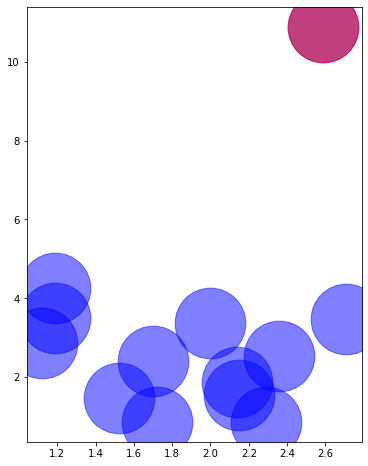

In [69]:
u = 1.35
graph = [(1.19, 4.25), 
         (2.71, 3.48), 
         (1.19, 3.51), 
         (2.00, 3.38), 
         (1.12, 2.86), 
         (1.70, 2.42),
         (2.36, 2.54),  
         (1.52, 1.48),
         (2.15, 1.54), 
         (2.14, 1.87), 
         (1.72, 0.86),
         (2.29, 0.87),  
         (2.59, 10.89)
        ]
################################### WITH EXTRA NODE
udmis = UDMIS(u, graph)

g1 = np.array([])
g2 = np.array([])
for i in range( int( np.size(graph) / 2) ):
  g1 = np.append(g1, graph[i][0])
  g2 = np.append(g2, graph[i][1])  

print(g1)
print(g2)
plt.figure(figsize=(6,8))
plt.scatter(g1, g2, s=5000, c='blue', alpha=0.5)
plt.scatter(g1[-1], g2[-1], s=5000, c='red', alpha=0.5)

0 100.0 -2.95 [ True False False False  True False  True  True False  True  True False
  True]
100 83.1764 0.7500000000000004 [False False False  True  True  True  True  True False False  True False
 False]
200 69.1831 4.15 [False False False False  True  True  True  True False  True  True  True
  True]
300 57.544 0.10000000000000009 [ True  True False  True  True  True  True False False  True False  True
 False]
400 47.863 -0.5999999999999996 [False False  True False  True False  True  True False  True  True False
 False]
500 39.8107 3.1500000000000012 [False  True  True  True False  True  True False  True  True False  True
  True]
600 33.1131 -0.6000000000000001 [ True  True False False False  True False  True False False  True  True
 False]
700 27.5423 -0.5999999999999988 [False False  True  True  True False  True False False  True False False
  True]
800 22.9087 -3.0 [False False False False  True False  True False  True False False False
 False]
900 19.0546 -1.2500000000000018 [ T

Text(0.5, 1.0, 'Slow convergence in 4000 steps')

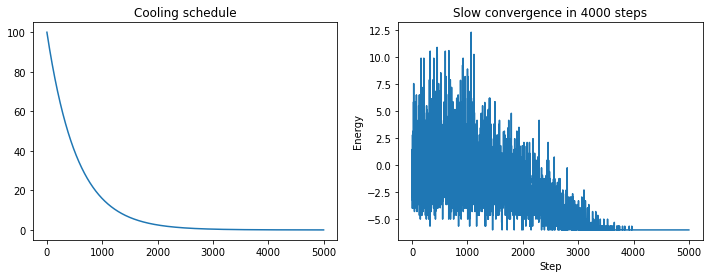

In [107]:
N = 5000
t = np.arange(N+1)
T_i = 100
T_f = 0.01

T = T_i * ((T_f/T_i) ** (t/N))

Energy = np.array([0])
for t in range(N):
    # take a look at the abstract_udmis.py file to see how mc_step works
    temp = T[t]
    E = udmis.mc_step(T=temp)
    Energy = np.append(Energy, E)

    if t % 100 == 0:
        print(t, round(temp, 4), E, udmis.occupations)

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
#plt.plot(np.log(T))
plt.plot(range(N+1), T)
plt.title('Cooling schedule')
plt.subplot(1, 2, 2)
plt.plot(range(N+1), Energy)
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Slow convergence in 4000 steps')

0 1.0 -6.0 [ True  True False False  True False False False False  True False  True
  True]
100 0.1353 -6.0 [ True  True False False  True False False False False  True False  True
  True]
200 0.0183 -6.0 [ True  True False False  True False False False False  True False  True
  True]
300 0.0025 -6.0 [ True  True False False  True False False False False  True False  True
  True]
400 0.0003 -6.0 [ True  True False False  True False False False False  True False  True
  True]


Text(0.5, 1.0, 'Fast convergence in 150 steps')

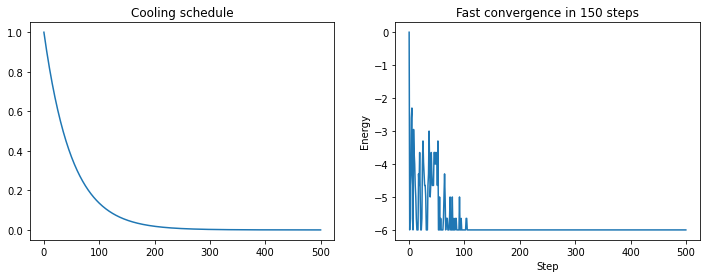

In [106]:
#Another version of cooling

N = 500
t = np.arange(N+1)
T_i = 1
T_f = 0.01

#T = T_i * ((T_f/T_i) ** (t/N))
T = T_i * np.exp(-t/N *10)

Energy = np.array([0])
for t in range(N):
    # take a look at the abstract_udmis.py file to see how mc_step works
    temp = T[t]
    E = udmis.mc_step(T=temp)
    Energy = np.append(Energy, E)
    
    if t % 100 == 0:
        print(t, round(temp, 4), E, udmis.occupations)

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
#plt.plot(np.log(T))
plt.plot(range(N+1), T)
plt.title('Cooling schedule')
plt.subplot(1, 2, 2)
plt.plot(range(N+1), Energy)
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Fast convergence in 150 steps')

In [4]:
#Energy function

N = 500
t = np.arange(N+1)
T_i = 1
T_f = 0.01

#T = T_i * ((T_f/T_i) ** (t/N))
T = T_i * np.exp(-t/N *10)
#T = T_i * (1 - np.tanh((t - 1000)/N *10) ) / 2

def Ergy(udmis):
  Energy = np.array([0])
  for t in range(N):
      # take a look at the abstract_udmis.py file to see how mc_step works
      temp = T[t]
      E = udmis.mc_step(T=temp)
      Energy = np.append(Energy, E)
      
#      if t % 4000 == 0:
#          print(t, round(temp, 4), E, udmis.occupations)
  return E


RandomPositionEnergy = []
xPosition = []
yPosition = []
for i in range(200):
  x = np.random.uniform(1.12, 2.71)
  y = np.random.uniform(0.86, 4.25)

  u = 1.35
  graph = [(1.19, 4.25), 
          (2.71, 3.48), 
          (1.19, 3.51), 
          (2.00, 3.38), 
          (1.12, 2.86), 
          (1.70, 2.42),
          (2.36, 2.54),  
          (1.52, 1.48),
          (2.15, 1.54), 
          (2.14, 1.87), 
          (1.72, 0.86),
          (2.29, 0.87),  
          (x, y)
          ]
  udmis = UDMIS(u, graph)

  e = Ergy(udmis)
  print('e = ', [e, x, y] )
  print('i = ', i )  
  RandomPositionEnergy = np.append(RandomPositionEnergy, e)
  xPosition = np.append(xPosition, x)
  yPosition = np.append(yPosition, y)  

print(RandomPositionEnergy)
print([xPosition, yPosition])

'''
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
#plt.plot(np.log(T))
plt.plot(T)
plt.subplot(1, 2, 2)
plt.plot(Energy)
plt.xlabel('Step')
plt.ylabel('Energy')
'''

13
e =  [-5.0, 2.679998250577838, 1.9500102019442451]
i =  0
13
e =  [-5.0, 1.587794744740827, 1.4626662042326832]
i =  1
13
e =  [-5.0, 1.9153390150153689, 1.2699988322467077]
i =  2
13
e =  [-5.0, 1.3766076071572686, 3.4840529234940827]
i =  3
13
e =  [-5.0, 1.7531490422463132, 1.5967948325610388]
i =  4
13
e =  [-5.0, 1.6697498657816077, 2.6473178613563]
i =  5
13
e =  [-5.0, 1.559273115949101, 2.101579951201314]
i =  6
13
e =  [-5.0, 1.887362788166795, 1.6315127804295662]
i =  7
13
e =  [-5.0, 1.2751946905733533, 4.135243809151846]
i =  8
13
e =  [-5.0, 1.7803474140998765, 2.283536484493078]
i =  9
13
e =  [-5.0, 1.5925247385615915, 2.548252960474523]
i =  10
13
e =  [-5.0, 1.3977440062340594, 3.496165357314789]
i =  11
13
e =  [-5.0, 1.6204064661463615, 3.442428668370697]
i =  12
13
e =  [-6.0, 1.6262265913687761, 1.8091319996788124]
i =  13
13
e =  [-5.0, 2.134458834780682, 3.451729863250603]
i =  14
13
e =  [-5.0, 2.2402561625237034, 2.429458092335087]
i =  15
13
e =  [-5.0, 1.1

"\nplt.figure(figsize=(12,4))\nplt.subplot(1, 2, 1)\n#plt.plot(np.log(T))\nplt.plot(T)\nplt.subplot(1, 2, 2)\nplt.plot(Energy)\nplt.xlabel('Step')\nplt.ylabel('Energy')\n"

Text(0.5, 1.0, 'Random towers')

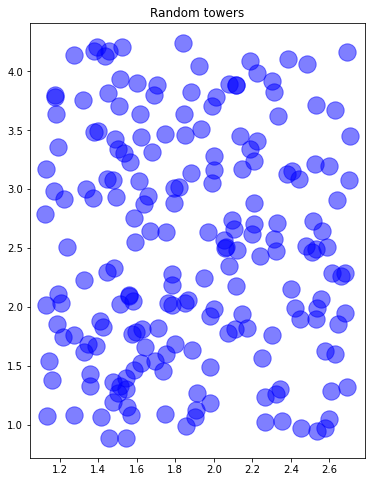

In [5]:
plt.figure(figsize=(6,8))
plt.scatter(xPosition, yPosition, s=300, c='blue', alpha=0.5)
plt.title('Random towers')

Text(0.5, 1.0, 'Random towers')

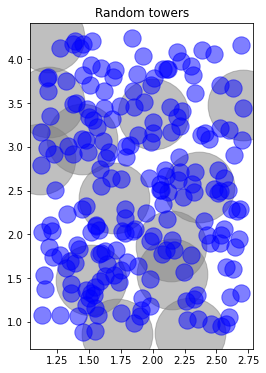

In [16]:
g1 = np.array([])
g2 = np.array([])
for i in range( int( np.size(graph) / 2) ):
  g1 = np.append(g1, graph[i][0])
  g2 = np.append(g2, graph[i][1])  

plt.figure(figsize=(4,6))
plt.scatter(g1, g2, s=5000, c='grey', alpha=0.5)
plt.scatter(xPosition, yPosition, s=300, c='blue', alpha=0.5)
plt.title('Random towers')

In [7]:
import pandas as pd
D = pd.DataFrame([RandomPositionEnergy, xPosition, yPosition])
D = D.T
D.columns = ['Energy', 'x', 'y']

AddTowers = D[D['Energy'] < -5]

writer = pd.ExcelWriter('Gotham City.xlsx')
D.to_excel(writer)
writer.save()
#D

Text(0.5, 1.0, 'Suggested locations of towers')

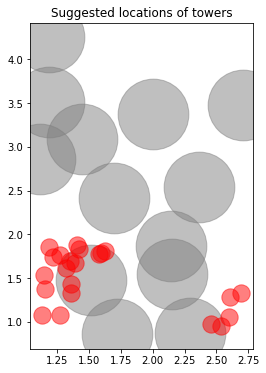

In [14]:
g1 = np.array([])
g2 = np.array([])
for i in range( int( np.size(graph) / 2) ):
  g1 = np.append(g1, graph[i][0])
  g2 = np.append(g2, graph[i][1])  

plt.figure(figsize=(4,6))
plt.scatter(g1, g2, s=5000, c='grey', alpha=0.5)
plt.scatter(AddTowers['x'], AddTowers['y'], s=300, c='red', alpha=0.5)
plt.title('Suggested locations of towers')